In [1]:
import pandas as pd
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import joblib

# ✅ STEP 1: Load Dataset (update path if needed)
csv_path = "/content/spam.csv"  # <-- replace with exact file path
df = pd.read_csv(csv_path, encoding='latin-1')

# ✅ STEP 2: Clean unwanted columns if present
df = df[['v1', 'v2']]  # Only keep label and text columns
df.columns = ['label', 'text']

# ✅ STEP 3: Encode labels
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# ✅ STEP 4: Preprocess text
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_text'] = df['text'].apply(clean_text)

# ✅ STEP 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# ✅ STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ STEP 7: Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# ✅ STEP 8: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ✅ STEP 9: Save model and vectorizer
joblib.dump(model, "spam_classifier.pkl")
joblib.dump(vectorizer, "tfidf_vectorizer.pkl")


Accuracy: 0.9506726457399103
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       1.00      0.63      0.78       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



['tfidf_vectorizer.pkl']

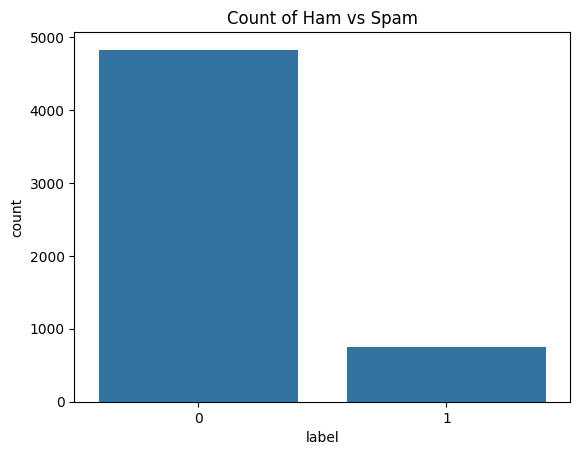

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df)
plt.title("Count of Ham vs Spam")
plt.show()


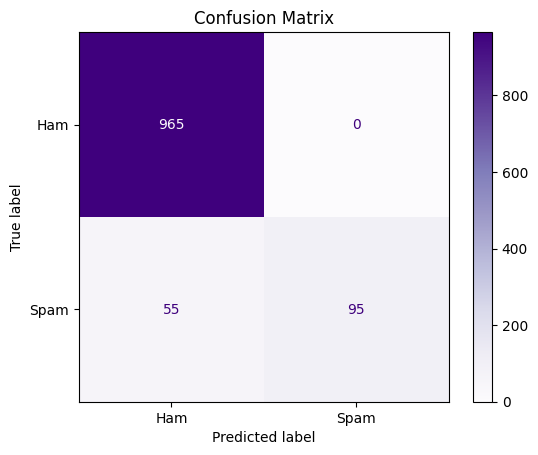

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Purples')
plt.title("Confusion Matrix")
plt.show()


In [4]:
# Training accuracy
train_preds = model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)

# Test accuracy
test_preds = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Test Accuracy: {test_accuracy:.4f}")


✅ Training Accuracy: 0.9619
✅ Test Accuracy: 0.9507


Accuracy: 0.9506726457399103

Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      1.00      0.97       965
        Spam       1.00      0.63      0.78       150

    accuracy                           0.95      1115
   macro avg       0.97      0.82      0.87      1115
weighted avg       0.95      0.95      0.95      1115



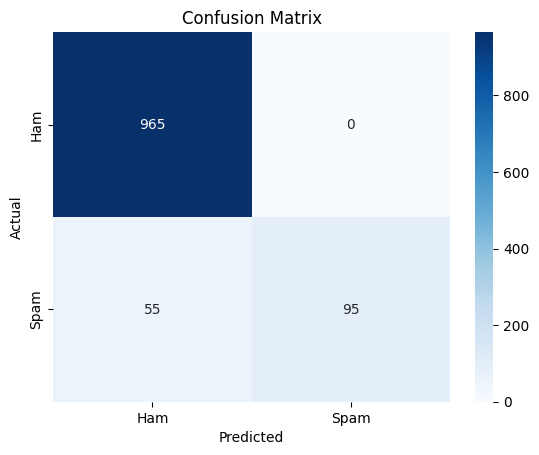

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test set
y_pred = model.predict(X_test)

# 1. Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# 2. Classification Report (includes Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# 3. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
